## How to evaluation performance of classification ML model?
- Big Picture
- Metrics
- Compare to baseline
- Compare to other models

In [22]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.DataFrame({
    'actual': ['coffee', 'no coffee', 'no coffee', 'coffee', 'coffee', 'coffee', 'no coffee', 'coffee'],
    'prediction': ['no coffee', 'no coffee', 'coffee', 'coffee', 'coffee', 'coffee', 'no coffee', 'no coffee'],
})
df

,actual,prediction
0,coffee,no coffee
1,no coffee,no coffee
2,no coffee,coffee
3,coffee,coffee
4,coffee,coffee
5,coffee,coffee
6,no coffee,no coffee
7,coffee,no coffee


In [3]:
pd.crosstab(df.actual, df.prediction)

prediction,coffee,no coffee
actual,,
coffee,3,2
no coffee,1,2


In [18]:
pd.crosstab(df.prediction, df.actual)
# by changing your actual and predication locations:
    # you flipped your FN and FP

actual,coffee,no coffee
prediction,,
coffee,3,1
no coffee,2,2


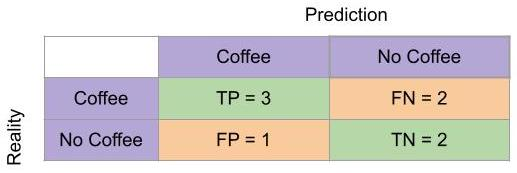

**TP = True Positive**

**FP = False Positive**

**FN = False Negative**

**TP = True negative**

Coffee - positive (1)
No-Coffee - negative (0)

- **True Positive**: 
    - We predicted coffee, it actually was coffee
- **True Negative**: 
    - We predicted 'no-coffee' and it actually was 'no-coffee'
- **False Positive**:
    - We predicted 'coffee', but in reality it was 'no-coffee' (Type I error)
- **False Negative**: 
    - We predicted 'no-coffee', but in reality it was 'coffee' (Type II error)

## Sklearn confusion matrix:

In [4]:
df

,actual,prediction
0,coffee,no coffee
1,no coffee,no coffee
2,no coffee,coffee
3,coffee,coffee
4,coffee,coffee
5,coffee,coffee
6,no coffee,no coffee
7,coffee,no coffee


In [20]:
y_true = df.actual
y_pred = df.prediction
y_true

0       coffee
1    no coffee
2    no coffee
3       coffee
4       coffee
5       coffee
6    no coffee
7       coffee
Name: actual, dtype: object

In [23]:
# first argument in confusion matrix is 'actual' and second is 'prediction'
confusion_matrix(y_true, y_pred)

#

array([[3, 2],
       [1, 2]])

- c[0,0] = TN 
    - the x in this: ([[x, 0], [0, 0]])
- c[0,1] = FP 
    - the x in this: ([[0, x], [0, 0]])
- c[1,0] = FN 
    - the x in this: ([[0, 0], [x, 0]])
- c[1,1] = TP 
    - the x in this: ([[0, 0], [0, x]])

In [24]:
sorted(('no coffee', 'coffee'))

['coffee', 'no coffee']

**Two classes: 'coffee', non-coffee'**

- When we create confusion matrix, which one is the 'positive' class and which one is 'negative' class in confusion matrix?

**Confusion matrix positive and negative Labels:**
- If you have binary classes ('1', '0'), then Sklearn assumes '1' is positive and '0' is negative.
- If you have non-binary class (e.g. 'coffee'/'no-coffee'), Sklearn assigns negative, positive label to the classes in sorted order.
- In the example above, the confusion matrix assumed 'coffee' as negative class

In [26]:
#confusion matrix with labels
confusion_matrix(y_true, y_pred, labels = ['no coffee', 'coffee'])
# we flipped our positive and negative class:
    # in this one
        # false = no coffee
        # positive = coffee
    # in the last one:
        # false = coffee
        # positive = no coffee

array([[2, 1],
       [2, 3]])

- c[0,0] = TN 
    - the x in this: ([[x, 0], [0, 0]])
- c[0,1] = FP 
    - the x in this: ([[0, x], [0, 0]])
- c[1,0] = FN 
    - the x in this: ([[0, 0], [x, 0]])
- c[1,1] = TP 
    - the x in this: ([[0, 0], [0, x]])

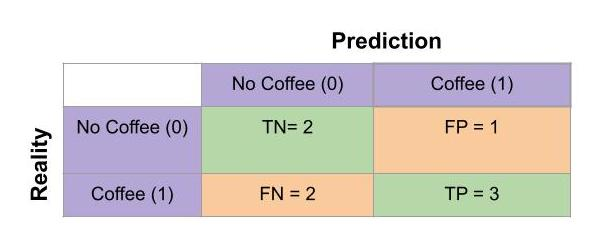

In [32]:
# Flatten the confusion matrix:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels = ['no coffee', 'coffee']).ravel()
tn, fp, fn, tp

(2, 1, 2, 3)

## Example: labels are 0 and 1:

In [30]:
confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0])

array([[0, 2],
       [1, 1]])

In [31]:
# Flatten the confusion matrix:
confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

array([0, 2, 1, 1])

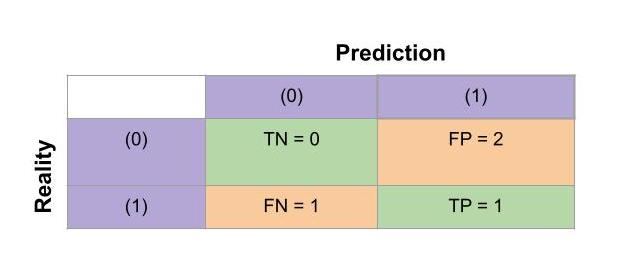

## Confusion Matrix Summary:
1. First argument in confusion matrix is 'actual' and second is 'prediction'
2. If you have binary classes ('1', '0'), then Sklearn assumes '1' is positive and '0' is negative.
3. If you have non-numeric class (e.g. 'coffee'/'no-coffee'), Sklearn assigns negative, positive label to the classes in sorted order (alphabetically) if no labels are specified
4. For non-numeric classes, it is best to pass the 'label' argument as the list, with first element as 'negative' and second element as 'positive' class
5. TN, FP, FN, TP = confusion_matrix(df.actual, df.predicted, label = ['...']).ravel()


# Classification Metrics:
### 1. Accuracy



- Easy to understand
- Can be misleading when working with imbalanced class problems
- Does not matter what your "positive" is... b/c the numerator is TP + TN.

### 2. Precision (aka postive predictive values PPV)

- How many of position predictions are actually true (1)?
- False negatives are "free", but false positives are costly
$$ \text{Precision =} \frac{\text{TP}}{\text{TP + FP}} $$
In our coffee example:

$$ \frac{3}{3 + 1} = 0.75 $$
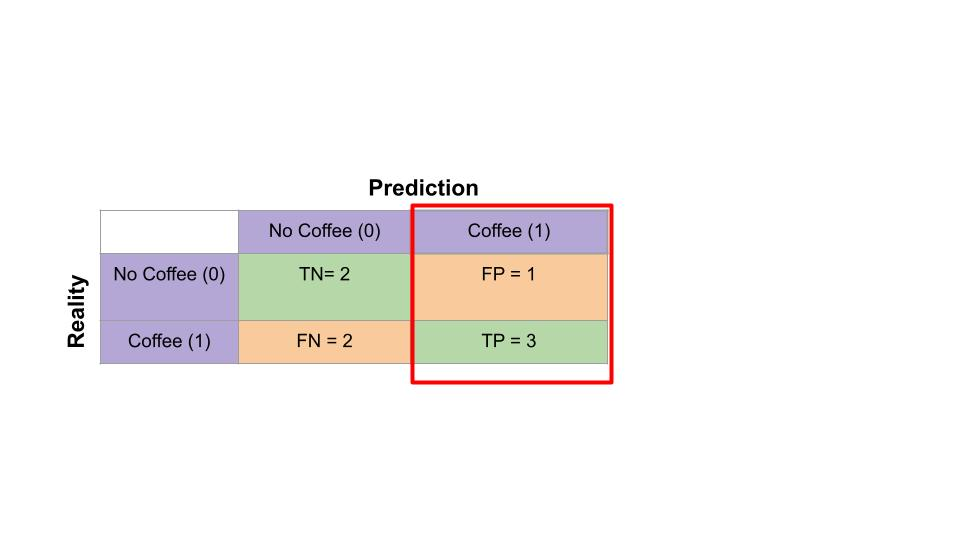

**Precision: When to choose?**
- Cost of acting on a positive prediction is high
    - you have made amodel and it predicats wether an email is spam or not
- Spam Filter:
    - **TP**: 
        - the email is spam and model correctly flagged it as spam
            - flagged as spam and is spam
    - **TN**: 
        - the email is not spam and model correctly flagged it as not spam
            - not flagged as spam and not spam
    - **FP**: 
        - The email is not spam but model flagged it as spam
            -  flagged as spam but not spam
    - **FN**: 
        - The email is spam, but model did not flag it as spam
            - not flagged as spam and is spam
- Optimize for precision when predicting whether or not an email message is spam, as it is better to send a spam message to a user's inbox than it is to send a real message to the spam folder.
- Want to minimize the False positive
    - Meaning you want high precision

### 2.Recall (aka Sensitivity)

- How many of actual/real positive cases are predicted as True/Positive ('1') by the model?
- False positives are "free", but false negatives are costly
$$ \frac{TP}{TP + FN} $$
In our example:

$$ \frac{3}{3 + 2} = 0.6 $$
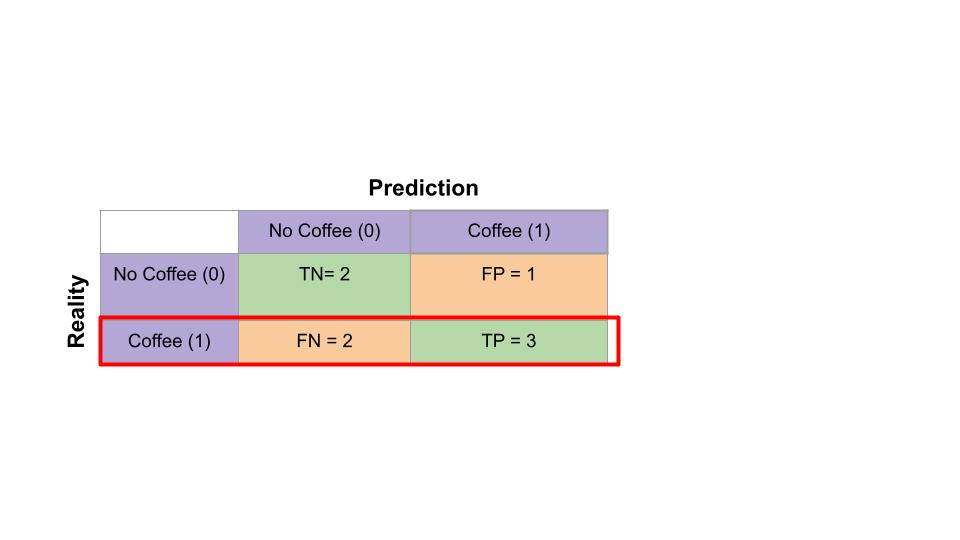

**Recall: When to choose?**
- Optimize for Recall when the cost of missing out on a positive case is high, or when it is *better to act on a predicted positive than not to.*
- Credit card fraud:
    - **TP:**
        - the transaction is fraud and model correctly flagged it as fraudlent
            - this is good
    - **TN:** 
        - the transaction is not fraud and model correctly flagged it as not-fraudlent
            - this is good
    - **FP:** 
        - The transction is not fraud but model flagged it as fradulent
            - this is not too bad but still eh
    - **FN:** 
        - The transction is fradulent, but model did not flag it as fradulent
            - this is really bad
            
- Want to reduce False Negatives to have a high recall

### 3. F-1 score
- What if you carer about both Precision and Recall?
- F1 score is the harmonic mean of precision and recall (why harmonic?)
$$ \text{F-1 score} = \frac{\text{2 * Precision * Recall}}{\text{Precision + Recall}} $$
- We want have high F1 score. This means we want both Precision and Recall to be high.

- Example use: 
    - Information retrieval applications such as search engines are often evaluated with the F-score.
    - making sure to reduce False Negative and False Positive
        - False positive
            - search you are not interested in
- Harmonic mean punishes the extreme values more i.e. to have high F1 score, it ensures that both precision and recall are high.

- Remember Arithmetic mean > Geometric Mean > Harmonic Mean

What do you care about?
Minimizing False positives --> Precision
Minimizing False negatives --> Recall
Both Precision and Recall --> F1 score

In [10]:
df

,actual,prediction
0,coffee,no coffee
1,no coffee,no coffee
2,no coffee,coffee
3,coffee,coffee
4,coffee,coffee
5,coffee,coffee
6,no coffee,no coffee
7,coffee,no coffee


In [11]:
y_true = df.actual
y_pred = df.prediction

In [12]:
(tn, fp, fn, tp) = confusion_matrix(y_true, y_pred,
                                    labels = ['no coffee', 'coffee']).ravel()
(tn, fp, fn, tp)

(2, 1, 2, 3)

In [13]:
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

True Positives 3
False Positives 1
False Negatives 2
True Negatives 2
-------------
Accuracy is 0.625
Recall is 0.6
Precision is 0.75


### 4. Area Under ROC Curve:
- How well a model can classify binary outcomes
    - 0 to 1
- A way to measure overall model performance for models that predict not just a class, but a probability as well.
    - how well does it predic the classes you have

**How is ROC curve generated?**
- By varying the cut-off between what is considered positive vs negative

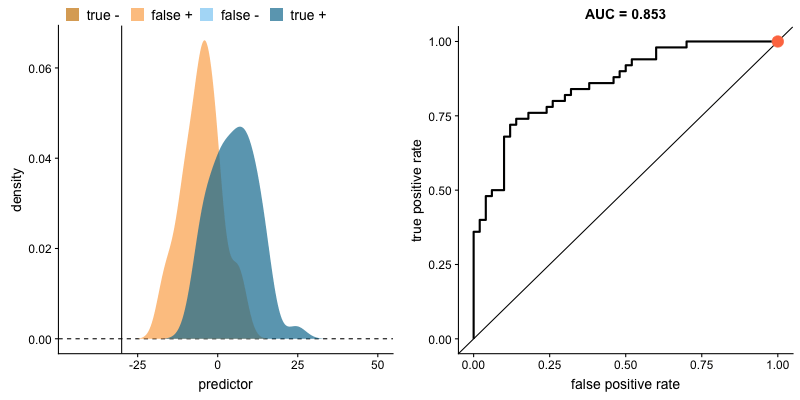


**What does shape/AUC of ROC curve signifies ?**
- The shape of an ROC curve changes when a model changes the way it classifies the two outcomes.ROC.gif

Animations source: https://github.com/dariyasydykova/open_projects/blob/master/ROC_animation/animations/ROC.gif

## Calculate Metrics manually using Pandas

In [14]:
df.actual.value_counts()

coffee       5
no coffee    3
Name: actual, dtype: int64

In [33]:
df['baseline_prediction'] = 'coffee'
df

,actual,prediction,baseline_prediction
0,coffee,no coffee,coffee
1,no coffee,no coffee,coffee
2,no coffee,coffee,coffee
3,coffee,coffee,coffee
4,coffee,coffee,coffee
5,coffee,coffee,coffee
6,no coffee,no coffee,coffee
7,coffee,no coffee,coffee


In [34]:
(df.actual == df.prediction).mean()

0.625

In [35]:
model_accuracy = (df.actual == df.prediction).mean()
baseline_accuracy = (df.actual == df.baseline_prediction).mean()

print(f'   model accuracy: {model_accuracy:.2%}')
print(f'baseline accuracy: {baseline_accuracy:.2%}')

   model accuracy: 62.50%
baseline accuracy: 62.50%


In [36]:
# Recall - only look at subset of actual positives (i.e actual == coffee)
subset = df[df.actual == 'coffee']
subset

,actual,prediction,baseline_prediction
0,coffee,no coffee,coffee
3,coffee,coffee,coffee
4,coffee,coffee,coffee
5,coffee,coffee,coffee
7,coffee,no coffee,coffee


In [38]:
# Recall - only look at subset of actual positives (i.e actual == coffee)
model_recall = (subset.actual == subset.prediction).mean()
baseline_recall = (subset.actual == subset.baseline_prediction).mean()

print(f'   model recall: {model_recall:.2%}')
print(f'baseline recall: {baseline_recall:.2%}')

   model recall: 60.00%
baseline recall: 100.00%


In [39]:
df

,actual,prediction,baseline_prediction
0,coffee,no coffee,coffee
1,no coffee,no coffee,coffee
2,no coffee,coffee,coffee
3,coffee,coffee,coffee
4,coffee,coffee,coffee
5,coffee,coffee,coffee
6,no coffee,no coffee,coffee
7,coffee,no coffee,coffee


In [41]:
# Precision: # only look at the subset where we made positive prediction (i.e. prediction == 'coffee')

subset = df[df.prediction == 'coffee']
subset

,actual,prediction,baseline_prediction
2,no coffee,coffee,coffee
3,coffee,coffee,coffee
4,coffee,coffee,coffee
5,coffee,coffee,coffee


In [42]:
model_precision = (subset.actual == subset.prediction).mean()
print(f'model precision: {model_precision:.2%}')

model precision: 75.00%


In [44]:
# Baseline Precision: # only look at the subset where we made positive prediction (i.e. prediction == 'coffee')
baseline_precision = (subset.actual == subset.baseline_prediction).mean()

print(f'baseline precision: {baseline_precision:.2%}')

baseline precision: 75.00%


## Metrics using Sklearn

In [45]:
# import sklearn functions
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [46]:
df

,actual,prediction,baseline_prediction
0,coffee,no coffee,coffee
1,no coffee,no coffee,coffee
2,no coffee,coffee,coffee
3,coffee,coffee,coffee
4,coffee,coffee,coffee
5,coffee,coffee,coffee
6,no coffee,no coffee,coffee
7,coffee,no coffee,coffee


In [47]:
y_true = df.actual
y_pred = df.prediction

In [48]:
# accuracy score in sklearn
accuracy_score(y_true, y_pred)

0.625

In [50]:
#recall score in sklearn
recall_score(y_true, y_pred, labels = ['no coffee', 'coffee'], 
             average = None)

array([0.66666667, 0.6       ])

In [51]:
# precision score in sklearn
precision_score(y_true, y_pred, labels = ['no coffee', 'coffee'], 
             average = None)

array([0.5 , 0.75])

## Metrics using classification report

In [58]:
print(classification_report(y_true, y_pred, 
                            labels = ['no coffee', 'coffee']))

              precision    recall  f1-score   support

   no coffee       0.50      0.67      0.57         3
      coffee       0.75      0.60      0.67         5

    accuracy                           0.62         8
   macro avg       0.62      0.63      0.62         8
weighted avg       0.66      0.62      0.63         8



### Bonus: Recognize Metric
You are a data-scientist at a bio-medical start-up company and working on developing rapid COVID test-kit. The test relies on number of inputs (e.g. patient's age, body temperature, BMI, symptoms along with some results from blood analysis) to make a prediction if patient is recently infected with coronavirus.

You demo your technology/test to FDA in hope of getting approval to sell the kits to general public. FDA asks you the following questions to assses your test-kit:

"What is the probability that your test-kit will show positive result, if the patient is actually infected?"
"If a patient tested positive using your test-kit, what is the probability that the patient is actually infected?"
"How good is your test in actually ruling out the infection. In other words, what is the probability that your test-kit will show negative result, if the patient is actually not infected?"
What metrics will you use to answer these questions?

Hint: You need to know metrics like Recall, Precision, Accuracy and other discussed in the curriculum.